Enter Your Age to Predict BMI
Enter age: 64

Predicted BMI: 30.50


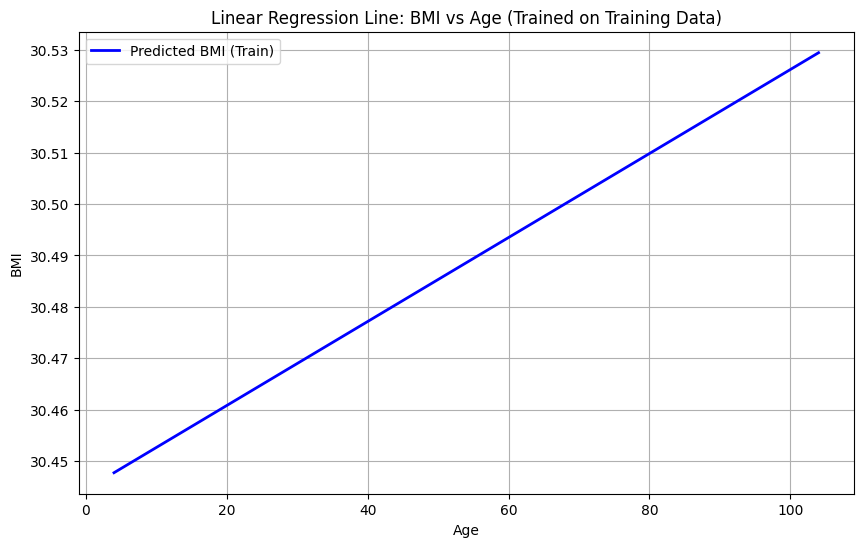

In [ ]:
//LINEAR REGRESSION

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load and clean the dataset
data = pd.read_csv('/content/dataset_med (1).csv')
data = data.dropna()

# Select input and target
X = data[['age']]
y = data['bmi']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Sort the training data for smooth plotting
train_sorted = X_train.copy()
train_sorted['bmi'] = y_train
train_sorted = train_sorted.sort_values(by='age')
X_sorted = train_sorted[['age']]
y_pred_sorted = model.predict(X_sorted)

# --- User Input for Prediction ---
print("Enter Your Age to Predict BMI")
try:
    age = float(input("Enter age: "))
    user_input = pd.DataFrame([[age]], columns=['age'])
    predicted_bmi = model.predict(user_input)[0]
    print(f"\nPredicted BMI: {predicted_bmi:.2f}")
except Exception as e:
    print(f"Invalid input. Please enter a numeric age. Error: {e}")

# --- Plotting Regression Line ---
plt.figure(figsize=(10, 6))
plt.plot(X_sorted['age'], y_pred_sorted, color='blue', linewidth=2, label='Predicted BMI (Train)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Linear Regression Line: BMI vs Age (Trained on Training Data)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
//KNN BEFORE PREPROCESSING

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('/content/dataset_med (1).csv')

# Convert cholesterol level to binary (0: normal, 1: high)
data['cholesterol_level'] = (data['cholesterol_level'] >= 200).astype(int)

# Features and target
X = data[['age', 'bmi', 'asthma', 'hypertension']]
y = data['cholesterol_level']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")

KNN Model Accuracy: 0.76


In [ ]:
//DATA PREPROCESSING

import pandas as pd
data = pd.read_csv('/content/dataset_med (1).csv')
data.dropna(inplace=True)
data.drop_duplicates(inplace = True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[data.select_dtypes(include='number').columns] = scaler.fit_transform(data.select_dtypes(include='number'))

data.to_csv("cleaned_test.csv", index=False)

print("Cleaned dataset has been saved to 'cleaned_disease_test.csv'")


Cleaned dataset has been saved to 'cleaned_disease_test.csv'


In [ ]:
//KNN AFTER PREPROCESSING

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('/content/cleaned_test.csv')

# Convert cholesterol level to binary (0: normal, 1: high)
data['cholesterol_level'] = (data['cholesterol_level'] >= 200).astype(int)

# Features and target
X = data[['age', 'bmi', 'asthma', 'hypertension']]
y = data['cholesterol_level']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")

KNN Model Accuracy: 1.00


In [ ]:
//LOGISTIC REGRESSION

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# --- Load and clean dataset ---
data = pd.read_csv('/content/dataset_med (1).csv')
data = data.dropna()

# Convert gender to numeric: Male = 1, Female = 0
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

# Convert cholesterol_level to binary: 1 = high, 0 = normal
data['cholesterol_level'] = (data['cholesterol_level'] >= 200).astype(int)

# Select features and target
X = data[['age', 'bmi', 'gender', 'cholesterol_level']]
y = data['survived']  # 0 = died, 1 = survived

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train logistic regression model
model = LogisticRegression(solver='liblinear', max_iter=200, class_weight='balanced')
model.fit(X_train, y_train)

# --- User Input for Prediction ---
print("Enter Info to Predict Survival")
try:
    age = float(input("Enter age: "))
    bmi = float(input("Enter BMI: "))
    gender_input = input("Enter gender (Male/Female): ").strip().capitalize()
    cholesterol = float(input("Enter cholesterol level: "))

    # Convert inputs
    gender = 1 if gender_input == 'Male' else 0
    cholesterol_binary = 1 if cholesterol >= 150 else 0

    # Prepare input
    user_data = pd.DataFrame([[age, bmi, gender, cholesterol_binary]],
                             columns=['age', 'bmi', 'gender', 'cholesterol_level'])

    # Preprocess user input
    user_data_imputed = imputer.transform(user_data)
    user_data_scaled = scaler.transform(user_data_imputed)

    # Predict
    prediction = model.predict(user_data_scaled)[0]
    result = "Survived" if prediction == 1 else "Did Not Survive"
    print(f"\nPredicted Outcome: {result}")

except Exception as e:
    print(f"\nInvalid input. Please enter valid values. Error: {e}")


Enter Info to Predict Survival
Enter age: 60
Enter BMI: 33
Enter gender (Male/Female): Male
Enter cholesterol level: 250

Predicted Outcome: Survived
